## Dataset

We have used 2 data set in this- exercise.csv and calories.csv

## Workflow

Just like the previous project we will be using the XGBoost Regressor for model training.

## Code

#### Data and dependencies

In [57]:
# imprting deps
import numpy as np
import pandas as pd
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
# reading the data
cal = pd.read_csv('/content/calories.csv')

In [3]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
cal.shape

(15000, 2)

In [7]:
exe = pd.read_csv('/content/exercise.csv')

In [8]:
exe.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
exe.shape

(15000, 8)

In [18]:
# combining the 2 dataFrame
data = pd.concat([exe, cal['Calories']], axis = 1)

In [19]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [20]:
data.shape

(15000, 9)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Means we don't have any null values

#### Data analyze

In [23]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [24]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

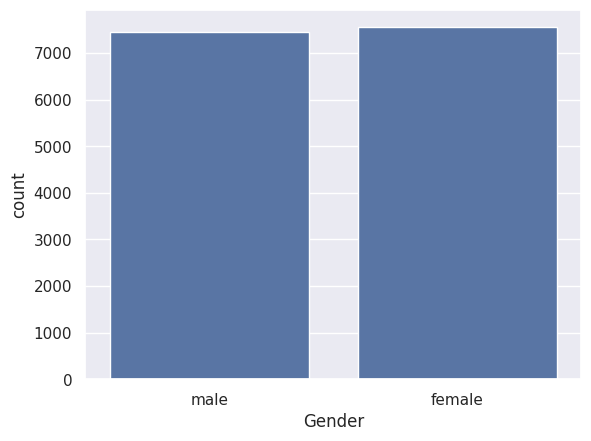

In [30]:
sns.countplot(x = 'Gender', data = data)

<Axes: xlabel='Gender', ylabel='count'>

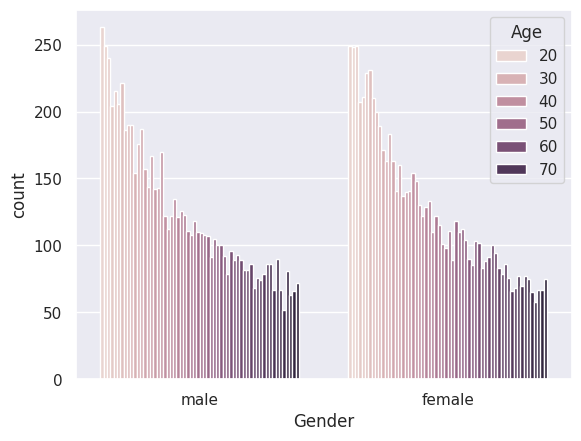

In [29]:
sns.countplot(x='Gender', hue='Age', data=data)

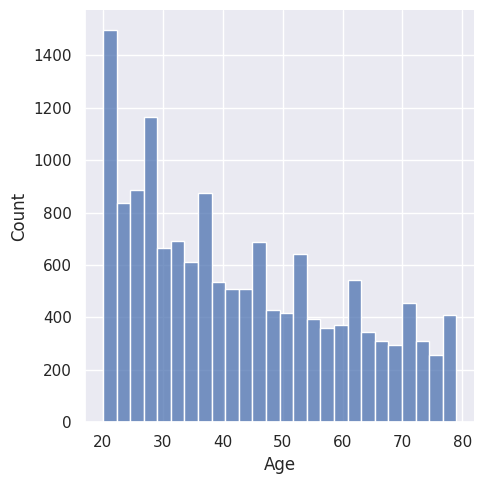

In [31]:
sns.displot(data['Age'])

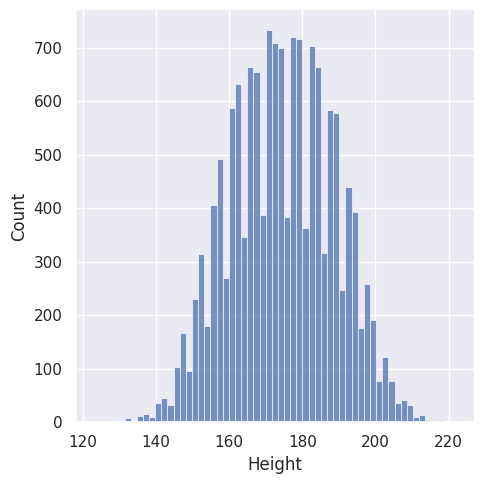

In [32]:
sns.displot(data['Height'])

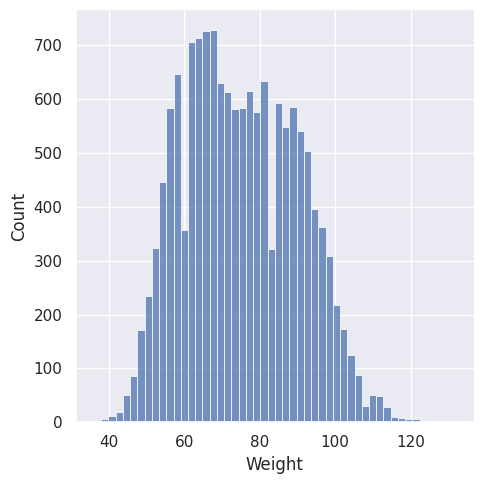

In [33]:
sns.displot(data['Weight'])

#### Co-relation

In [35]:
# Convert 'Gender' column to numerical representation
data['Gender'] = data['Gender'].map({'male': 0, 'female': 1})

# Now calculate the correlation matrix
corelation = data.corr()

<Axes: >

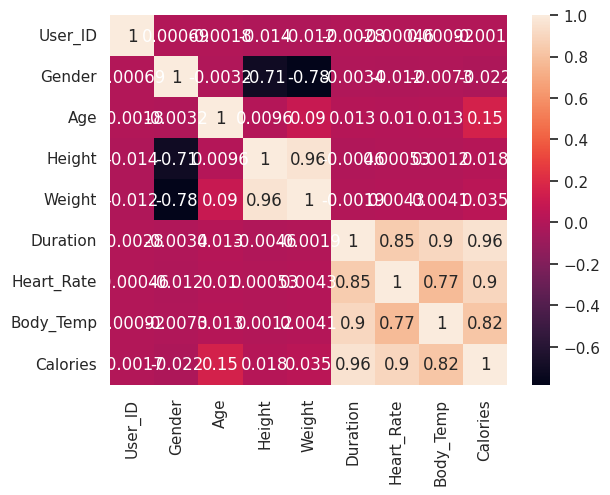

In [39]:
sns.heatmap(corelation, annot = True)

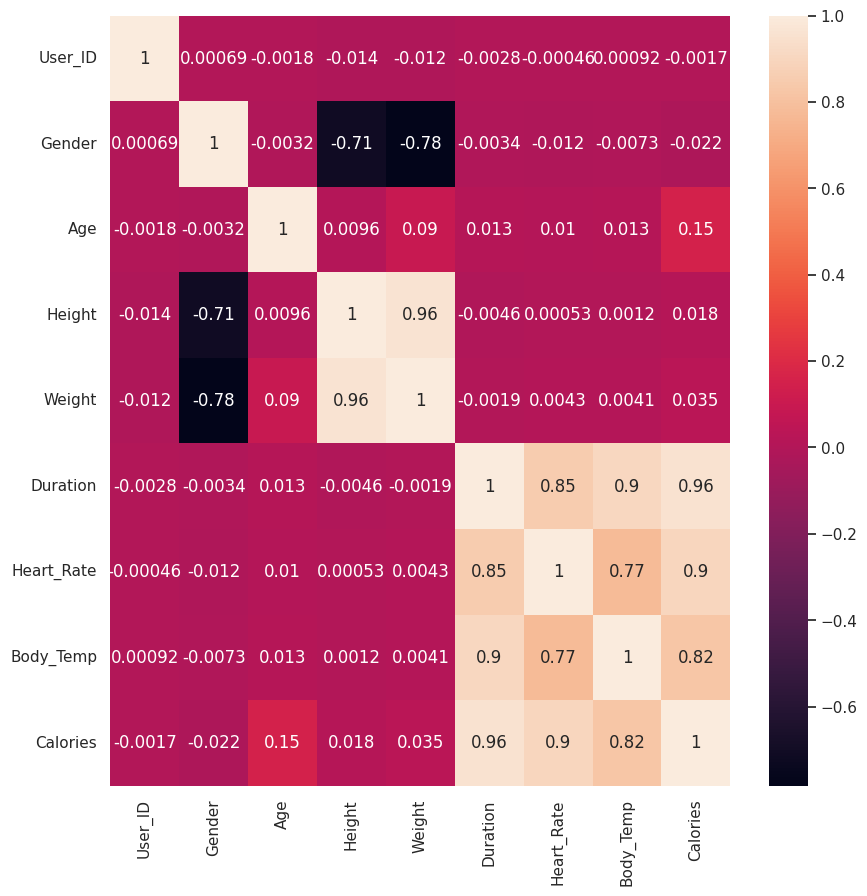

In [42]:
# Heat Nap
plt.figure(figsize=(10,10))
sns.heatmap(corelation, annot=True)
plt.show()

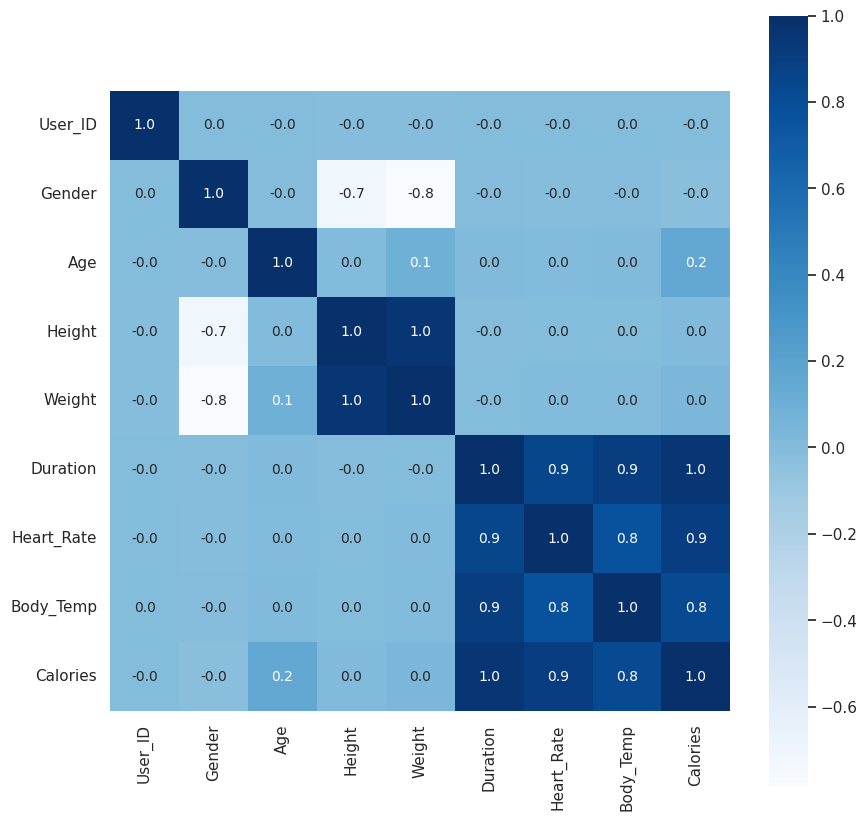

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation, cbar=True, square=True, fmt='.1f', annot= True, annot_kws={'size': 10}, cmap='Blues' )
plt.show()

#### Feature and Target

In [47]:
X = data.drop(['Calories', 'User_ID'], axis = 1)
Y = data['Calories']

In [48]:
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

#### Train Test Split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### Model Train

In [50]:
model = XGBRegressor()

In [51]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Evaluation

In [53]:
# On test data prediction
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [55]:
# On train data prediction
train_data_prediction = model.predict(X_train)
print(train_data_prediction)

[ 11.680271  36.71814   31.747328 ... 108.05978  179.23735   44.236874]


In [58]:
# Mean absolute Error
mae_test = mean_absolute_error(Y_test, test_data_prediction)
print('MAE for test data : ', mae_test)

mae_train = mean_absolute_error(Y_train, train_data_prediction)
print('MAE for train data : ', mae_train)

MAE for test data :  1.4833678883314132
MAE for train data :  0.9322033420062313


#### Making prediction

In [63]:

input_data = (0, 21,157.0,56.0,17.0,100.0,40.0)

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[79.12409]


In [65]:

input_data = (1, 33,173.0,73.0,7.0,78.0,39.3)

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[22.507109]
